In [1]:
# This code is adapted from
# https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
import tensorflow as tf
#tf.logging.set_verbosity(tf.logging.ERROR)

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

# normalize inputs from 0-255 to 0-1 to make neural network happy
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs (create ten possible outputs and assign a 0/1 label to each object)
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

11493376/11490434 [==============================] - 1s 0us/step


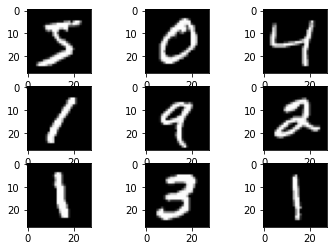

In [4]:
#Visualize first few objects of training set
import matplotlib.pyplot as plt
import numpy as np
for i in range(9):
  plt.subplot(3,3,i+1)
  first_image = np.array(X_train[i], dtype='float')
  pixels = first_image.reshape((28, 28))
  plt.imshow(pixels, cmap='gray')

In [5]:
# define a simple CNN model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D())
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [6]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 9s 144us/step - loss: 0.2359 - accuracy: 0.9316 - val_loss: 0.0758 - val_accuracy: 0.9765
Epoch 2/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0730 - accuracy: 0.9778 - val_loss: 0.0534 - val_accuracy: 0.9810
Epoch 3/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0518 - accuracy: 0.9843 - val_loss: 0.0416 - val_accuracy: 0.9863
Epoch 4/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0408 - accuracy: 0.9873 - val_loss: 0.0426 - val_accuracy: 0.9871
Epoch 5/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0327 - accuracy: 0.9901 - val_loss: 0.0347 - val_accuracy: 0.9886
Epoch 6/10
60000/60000 [==============================] - 2s 28us/step - loss: 0.0269 - accuracy: 0.9915 - val_loss: 0.0346 - val_accuracy: 0.9885
Epoch 7/10
60000/60000 [==============================] - 2s 28us/s

In [7]:
ix = np.random.random_integers(0,1000)

print(ix)

599


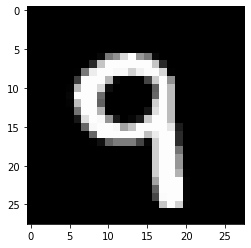

In [8]:
plt.imshow((X_test[ix]).reshape(28,28), cmap='gray')

In [9]:
np.argmax(model.predict(X_test)[ix])

9

Save predictions

In [10]:
cpred = model.predict(X_test)

In [33]:
cpred[:5,:]

array([[5.67698555e-09, 1.31546174e-09, 4.38644321e-08, 2.23753943e-07,
        1.03610222e-13, 4.85163298e-10, 9.80369803e-16, 9.99999523e-01,
        9.79238357e-10, 2.47531602e-07],
       [1.16325500e-11, 2.05638031e-07, 9.99999762e-01, 3.50056599e-13,
        6.85380150e-17, 1.59562711e-13, 2.80226731e-09, 1.73752711e-12,
        2.08512114e-11, 1.14324350e-14],
       [3.79332687e-06, 9.99940157e-01, 8.64784397e-07, 6.33288000e-09,
        9.03234013e-06, 1.16626488e-07, 7.13712211e-07, 3.32387244e-05,
        1.18732851e-05, 2.01126397e-07],
       [9.99991894e-01, 1.24327293e-09, 1.61182729e-08, 5.33905697e-10,
        8.03082947e-11, 2.90731901e-08, 8.01771057e-06, 9.04584923e-08,
        1.05261876e-10, 2.21193623e-08],
       [5.57906876e-09, 2.71640985e-08, 9.55088897e-10, 8.59711635e-10,
        9.99856830e-01, 1.47942025e-09, 2.45235423e-08, 3.13351762e-08,
        1.58300875e-08, 1.43132609e-04]], dtype=float32)

In [11]:
#Save predicted class for the first 1000 objects

pred = [np.argmax(cpred[i]) for i in range(1000)]

In [12]:
#Save true class for the first 1000 objects

true = [np.argmax(y_test[i]) for i in range(1000)]

In [13]:
#Find differences

err = np.where(np.array(pred) != np.array(true))

In [14]:
err

(array([ 18, 115, 247, 340, 445, 582, 659, 740, 947]),)

In [15]:
len(err[0])

9

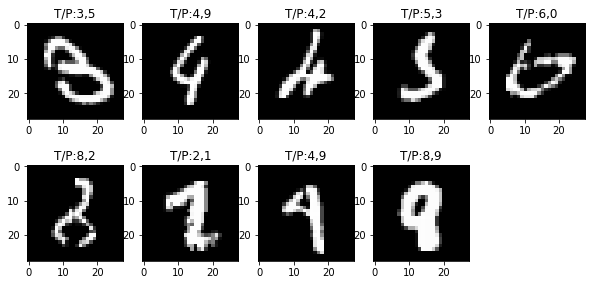

In [16]:
#Visualize wrongly classified examples
plt.figure(figsize=(10,10))
for i in range(len(err[0])):
  plt.subplot(4,5,i+1)
  first_image = np.array(X_test[err[0][i]], dtype='float')
  pixels = first_image.reshape((28, 28))
  plt.imshow(pixels, cmap='gray')
  plt.title('T/P:'+str(true[err[0][i]])+','+str(pred[err[0][i]]))